<a href="https://colab.research.google.com/github/Sravani-05/Classifications/blob/main/o1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install PyCaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 14.2 MB/s 
     |████████████████████████████████| 17.0 MB 217 kB/s 
     |████████████████████████████████| 134 kB 69.1 MB/s 
     |████████████████████████████████| 167 kB 68.9 MB/s 
     |████████████████████████████████| 268 kB 67.1 MB/s 
     |████████████████████████████████| 56 kB 5.3 MB/s 
     |████████████████████████████████| 636 kB 64.5 MB/s 
     |████████████████████████████████| 1.3 MB 61.5 MB/s 
     |████████████████████████████████| 3.3 MB 58.1 MB/s 
     |████████████████████████████████| 2.0 MB 59.0 MB/s 
     |████████████████████████████████| 25.9 MB 1.4 MB/s 
     |████████████████████████████████| 1.7 MB 63.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from pycaret.datasets import get_data
import pandas as pd

dataset = pd.read_csv("/content/drive/MyDrive/Data mining/glass.csv")

In [ ]:
dataset.shape

(214, 10)

In [ ]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))


Data for Modeling: (203, 10)
Unseen Data For Predictions: (11, 10)


In [ ]:
from pycaret.classification import *
from pycaret.classification import compare_models


In [ ]:
exp_clf102 = setup(data = data, target = 'Type', session_id=123)


,Description,Value
0,session_id,123
1,Target,Type
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(203, 10)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Type',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strateg...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [ ]:
best_model = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7886,0.1918,0.6968,0.7611,0.7608,0.7016,0.7177,0.108
et,Extra Trees Classifier,0.7529,0.1950,0.6844,0.7334,0.7274,0.6490,0.6638,0.398
rf,Random Forest Classifier,0.7386,0.1965,0.6481,0.7101,0.7058,0.6278,0.6454,0.451
gbc,Gradient Boosting Classifier,0.6895,0.1866,0.5609,0.6705,0.6702,0.5594,0.5713,0.351
dt,Decision Tree Classifier,0.6824,0.1663,0.6335,0.7090,0.6822,0.5624,0.5695,0.012
lda,Linear Discriminant Analysis,0.6205,0.1712,0.5225,0.6248,0.5930,0.4717,0.4910,0.012
knn,K Neighbors Classifier,0.5833,0.1753,0.4648,0.6012,0.5582,0.4145,0.4352,0.113
lr,Logistic Regression,0.5476,0.1641,0.4781,0.5218,0.5046,0.3495,0.3717,0.410
ridge,Ridge Classifier,0.5148,0.0000,0.4211,0.4354,0.4588,0.3138,0.3350,0.012
qda,Quadratic Discriminant Analysis,0.4657,0.0850,0.3560,0.4228,0.4142,0.3007,0.3274,0.015


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
models()


INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
dt = create_model('dt')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.7877,0.5361,0.6933,0.6711,0.5614,0.5647
1,0.8000,0.8758,0.7667,0.8222,0.8030,0.7368,0.7412
2,0.5714,0.0000,0.6000,0.7024,0.5846,0.4286,0.4468
3,0.6429,0.0000,0.5333,0.6607,0.6472,0.5035,0.5108
4,0.8571,0.0000,0.9200,0.8810,0.8603,0.8042,0.8099
5,0.7143,0.0000,0.6200,0.6667,0.6883,0.5882,0.5930
6,0.7857,0.0000,0.7200,0.7381,0.7597,0.6912,0.6968
7,0.5714,0.0000,0.5333,0.6357,0.5815,0.4043,0.4101
8,0.6429,0.0000,0.8000,0.6500,0.6385,0.5105,0.5143


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
dt = create_model('dt', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7241,0.8090,0.5648,0.6855,0.6981,0.6221,0.6264
1,0.5172,0.6917,0.4833,0.5536,0.5148,0.3773,0.3852
2,0.7500,0.0000,0.6970,0.7725,0.7461,0.6494,0.6553
3,0.6071,0.7209,0.5838,0.5890,0.5798,0.4568,0.4710
4,0.6429,0.7393,0.5240,0.6333,0.6345,0.4872,0.4892
Mean,0.6483,0.5922,0.5706,0.6468,0.6347,0.5186,0.5254
Std,0.0837,0.2986,0.0721,0.0768,0.0822,0.1026,0.1010


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
rf = create_model('rf', round = 2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.87,0.99,0.78,0.84,0.84,0.82,0.84
1,0.73,0.98,0.60,0.65,0.68,0.64,0.65
2,0.57,0.00,0.60,0.57,0.54,0.40,0.43
3,0.57,0.00,0.44,0.56,0.56,0.38,0.39
4,0.86,0.00,0.60,0.76,0.80,0.79,0.81
5,0.71,0.00,0.52,0.68,0.66,0.59,0.63
6,0.86,0.00,0.76,0.80,0.82,0.79,0.80
7,0.57,0.00,0.38,0.50,0.53,0.36,0.37
8,0.86,0.00,0.93,0.91,0.86,0.81,0.82


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_rf = tune_model(rf, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7333,0.9476,0.5778,0.6667,0.6824,0.6341,0.6518
1,0.8000,0.9029,0.7667,0.8000,0.7708,0.7368,0.7545
2,0.6429,0.0000,0.6400,0.7698,0.5884,0.5000,0.5693
3,0.5714,0.0000,0.5000,0.7245,0.5969,0.4207,0.4421
4,0.7857,0.0000,0.7200,0.7738,0.7651,0.7063,0.7163
5,0.7143,0.0000,0.6200,0.6905,0.6818,0.5912,0.6004
6,0.7143,0.0000,0.4600,0.7232,0.6874,0.5789,0.6095
7,0.5714,0.0000,0.5500,0.5714,0.5671,0.4000,0.4029
8,0.7857,0.0000,0.9000,0.8714,0.7778,0.7200,0.7507


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_rf2 = tune_model(rf, optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7333,0.9481,0.7111,0.8000,0.7233,0.6591,0.6865
1,0.6667,0.8505,0.7000,0.6611,0.6249,0.5739,0.6085
2,0.6429,0.0000,0.6400,0.7500,0.5714,0.4853,0.5880
3,0.6429,0.0000,0.6400,0.6250,0.6234,0.5000,0.5073
4,0.7143,0.0000,0.6800,0.7589,0.6693,0.6000,0.6481
5,0.5714,0.0000,0.5400,0.5893,0.5758,0.4000,0.4029
6,0.7857,0.0000,0.8800,0.8661,0.7645,0.7000,0.7499
7,0.5714,0.0000,0.5667,0.7341,0.5330,0.4167,0.4961
8,0.7143,0.0000,0.7000,0.6905,0.6762,0.6056,0.6278


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
plot_model(tuned_rf, plot = 'parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
class_weight,{}
criterion,entropy
max_depth,5
max_features,1.0
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0002
min_impurity_split,None


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_rf2, plot = 'parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
class_weight,balanced_subsample
criterion,entropy
max_depth,4
max_features,log2
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0002
min_impurity_split,None


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.7877,0.5361,0.6933,0.6711,0.5614,0.5647
1,0.8000,0.8758,0.7667,0.8222,0.8030,0.7368,0.7412
2,0.5714,0.0000,0.6000,0.7024,0.5846,0.4286,0.4468
3,0.6429,0.0000,0.5333,0.6607,0.6472,0.5035,0.5108
4,0.8571,0.0000,0.9200,0.8810,0.8603,0.8042,0.8099
5,0.7143,0.0000,0.6200,0.6667,0.6883,0.5882,0.5930
6,0.7857,0.0000,0.7200,0.7381,0.7597,0.6912,0.6968
7,0.5714,0.0000,0.5333,0.6357,0.5815,0.4043,0.4101
8,0.6429,0.0000,0.8000,0.6500,0.6385,0.5105,0.5143


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
bagged_dt = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7333,0.9340,0.7028,0.7667,0.7378,0.6552,0.6590
1,0.7333,0.9576,0.6000,0.6889,0.7067,0.6407,0.6446
2,0.5000,0.0000,0.5600,0.4864,0.4821,0.3000,0.3090
3,0.7143,0.0000,0.6800,0.6862,0.6905,0.5882,0.6023
4,0.7143,0.0000,0.5200,0.6905,0.6915,0.5971,0.6060
5,0.7143,0.0000,0.5200,0.6190,0.6597,0.5852,0.5948
6,0.7143,0.0000,0.8400,0.7321,0.7143,0.6111,0.6155
7,0.5714,0.0000,0.3333,0.6429,0.5476,0.4085,0.4545
8,0.7857,0.0000,0.7333,0.7476,0.7545,0.6934,0.7093


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                      

In [ ]:
print(bagged_dt)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=123,
 

In [ ]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.7734,0.5361,0.6489,0.6469,0.5509,0.5581
1,0.7333,0.8401,0.7333,0.7722,0.7363,0.6571,0.6650
2,0.5000,0.0000,0.5600,0.5238,0.4826,0.3333,0.3475
3,0.7143,0.0000,0.7000,0.7679,0.7381,0.6138,0.6183
4,0.7143,0.0000,0.6800,0.6726,0.6835,0.5971,0.6060
5,0.5714,0.0000,0.3800,0.4881,0.5260,0.3636,0.3703
6,0.7857,0.0000,0.7200,0.7381,0.7597,0.6912,0.6968
7,0.5714,0.0000,0.5333,0.6357,0.5815,0.4043,0.4101
8,0.6429,0.0000,0.8000,0.6500,0.6385,0.5105,0.5143


INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 10
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fract

In [ ]:
bagged_dt2 = ensemble_model(dt, n_estimators=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.9795,0.7444,0.8133,0.7970,0.7368,0.7412
1,0.7333,0.9486,0.6000,0.6444,0.6808,0.6341,0.6424
2,0.6429,0.0000,0.6400,0.7698,0.5884,0.5000,0.5693
3,0.6429,0.0000,0.6400,0.6250,0.6234,0.5000,0.5073
4,0.7143,0.0000,0.5200,0.6905,0.6915,0.5971,0.6060
5,0.6429,0.0000,0.4800,0.5672,0.5905,0.4815,0.4974
6,0.7857,0.0000,0.7200,0.7381,0.7597,0.6912,0.6968
7,0.6429,0.0000,0.3611,0.6633,0.6221,0.5000,0.5309
8,0.7857,0.0000,0.9000,0.8690,0.7762,0.7143,0.7501


INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 11
INFO:logs:BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                     

In [ ]:
lightgbm = create_model('lightgbm', verbose = False)
dt = create_model('dt', verbose = False)
lr = create_model('lr', verbose = False)

INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=lightgbm, fold=None, round=4, cross_validation=True, predict=True, fit_kwargs=None, groups=None, refit=True, verbose=False, system=True, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Light Gradient Boosting Machine Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=None, shuffle=False), n_jobs=-1
INFO:logs:Calculating mean and std
INFO:logs:Creating metrics dataframe
INFO:logs:Finalizing model
INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:create_model_container: 24
INFO:logs:master_model_c

In [ ]:
blend_soft = blend_models(estimator_list = [lightgbm, dt, lr], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.9595,0.5361,0.6600,0.6489,0.5614,0.5681
1,0.9333,0.9410,0.8333,0.8778,0.9030,0.9085,0.9145
2,0.7143,0.0000,0.6800,0.7946,0.6931,0.6000,0.6427
3,0.7143,0.0000,0.6800,0.6862,0.6905,0.5882,0.6023
4,0.7857,0.0000,0.5600,0.6786,0.7273,0.6818,0.6944
5,0.7143,0.0000,0.5200,0.6190,0.6597,0.5852,0.5948
6,0.7857,0.0000,0.7200,0.7381,0.7597,0.6912,0.6968
7,0.6429,0.0000,0.5833,0.6643,0.6260,0.4928,0.5077
8,0.6429,0.0000,0.8000,0.6500,0.6385,0.5105,0.5143


INFO:logs:create_model_container: 27
INFO:logs:master_model_container: 27
INFO:logs:display_container: 15
INFO:logs:VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=123, reg_alpha=0.0,
                                             reg_lambda=0.0, silent

In [ ]:
blend_hard = blend_models(estimator_list = [lightgbm, dt, lr], method = 'hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7333,0.0,0.5778,0.6667,0.6824,0.6341,0.6518
1,0.8000,0.0,0.6333,0.7000,0.7455,0.7188,0.7293
2,0.6429,0.0,0.6400,0.6565,0.6310,0.5000,0.5149
3,0.7143,0.0,0.6800,0.6862,0.6905,0.5882,0.6023
4,0.8571,0.0,0.6000,0.7381,0.7922,0.7879,0.8024
5,0.6429,0.0,0.4800,0.5672,0.5905,0.4815,0.4974
6,0.7857,0.0,0.7200,0.7381,0.7597,0.6912,0.6968
7,0.7143,0.0,0.6333,0.7704,0.6935,0.6000,0.6370
8,0.7143,0.0,0.8500,0.7429,0.7095,0.6138,0.6270


INFO:logs:create_model_container: 28
INFO:logs:master_model_container: 28
INFO:logs:display_container: 16
INFO:logs:VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=123, reg_alpha=0.0,
                                             reg_lambda=0.0, silent

In [ ]:
top3 = compare_models(n_select = 3)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7886,0.1918,0.6968,0.7611,0.7608,0.7016,0.7177,0.059
et,Extra Trees Classifier,0.7529,0.1950,0.6844,0.7334,0.7274,0.6490,0.6638,0.407
rf,Random Forest Classifier,0.7386,0.1965,0.6481,0.7101,0.7058,0.6278,0.6454,0.451
gbc,Gradient Boosting Classifier,0.6895,0.1866,0.5609,0.6705,0.6702,0.5594,0.5713,0.355
dt,Decision Tree Classifier,0.6824,0.1663,0.6335,0.7090,0.6822,0.5624,0.5695,0.013
lda,Linear Discriminant Analysis,0.6205,0.1712,0.5225,0.6248,0.5930,0.4717,0.4910,0.015
knn,K Neighbors Classifier,0.5833,0.1753,0.4648,0.6012,0.5582,0.4145,0.4352,0.114
lr,Logistic Regression,0.5476,0.1641,0.4781,0.5218,0.5046,0.3495,0.3717,0.180
ridge,Ridge Classifier,0.5148,0.0000,0.4211,0.4354,0.4588,0.3138,0.3350,0.011
qda,Quadratic Discriminant Analysis,0.4657,0.0850,0.3560,0.4228,0.4142,0.3007,0.3274,0.015


INFO:logs:create_model_container: 42
INFO:logs:master_model_container: 42
INFO:logs:display_container: 17
INFO:logs:[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,

In [ ]:
blender_top3 = blend_models(top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7333,0.9933,0.5778,0.6778,0.6844,0.6429,0.6593
1,0.8000,0.9800,0.5000,0.6750,0.7231,0.7115,0.7454
2,0.5714,0.0000,0.6000,0.5714,0.5678,0.4000,0.4029
3,0.7143,0.0000,0.5200,0.6984,0.6658,0.5758,0.6360
4,0.8571,0.0000,0.6000,0.7551,0.7976,0.7879,0.8091
5,0.7857,0.0000,0.5600,0.7075,0.7294,0.6889,0.7116
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.7143,0.0000,0.6333,0.7704,0.6935,0.6000,0.6370
8,0.9286,0.0000,0.9667,0.9429,0.9293,0.9000,0.9065


INFO:logs:create_model_container: 43
INFO:logs:master_model_container: 43
INFO:logs:display_container: 18
INFO:logs:VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=123, reg_alpha=0.0,
                                             reg_lambda=0.0, silent

In [ ]:
print(blender_top3.estimators_)

[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False), RandomFo

In [ ]:
stack_soft = stack_models(top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.9692,0.5361,0.6489,0.6469,0.5509,0.5581
1,0.8000,0.9638,0.6333,0.7222,0.7511,0.7305,0.7395
2,0.5000,0.0000,0.4000,0.4643,0.4805,0.2794,0.2817
3,0.7143,0.0000,0.6800,0.6862,0.6905,0.5882,0.6023
4,0.8571,0.0000,0.6000,0.7551,0.7976,0.7879,0.8091
5,0.8571,0.0000,0.6000,0.7500,0.7961,0.7926,0.8056
6,0.9286,0.0000,0.8000,0.8690,0.8961,0.8971,0.9043
7,0.7143,0.0000,0.6333,0.7704,0.6935,0.6000,0.6370
8,0.9286,0.0000,0.9667,0.9429,0.9293,0.9000,0.9065


INFO:logs:create_model_container: 44
INFO:logs:master_model_container: 44
INFO:logs:display_container: 19
INFO:logs:StackingClassifier(cv=5,
                   estimators=[('lightgbm',
                                LGBMClassifier(boosting_type='gbdt',
                                               class_weight=None,
                                               colsample_bytree=1.0,
                                               importance_type='split',
                                               learning_rate=0.1, max_depth=-1,
                                               min_child_samples=20,
                                               min_child_weight=0.001,
                                               min_split_gain=0.0,
                                               n_estimators=100, n_jobs=-1,
                                               num_leaves=31, objective=None,
                                               random_state=123, reg_alpha=0.0,
                  

In [ ]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8667,0.9862,0.7778,0.8381,0.8378,0.8193,0.8356
1,0.7333,0.9786,0.6000,0.6500,0.6764,0.6407,0.6526
2,0.5714,0.0000,0.6000,0.5714,0.5361,0.4000,0.4285
3,0.5714,0.0000,0.4400,0.5638,0.5595,0.3824,0.3915
4,0.8571,0.0000,0.6000,0.7551,0.7976,0.7879,0.8091
5,0.7143,0.0000,0.5200,0.6756,0.6569,0.5852,0.6253
6,0.8571,0.0000,0.7600,0.7976,0.8247,0.7941,0.8005
7,0.5714,0.0000,0.3833,0.5000,0.5286,0.3636,0.3730
8,0.8571,0.0000,0.9333,0.9071,0.8587,0.8069,0.8243


INFO:logs:create_model_container: 45
INFO:logs:master_model_container: 45
INFO:logs:display_container: 20
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


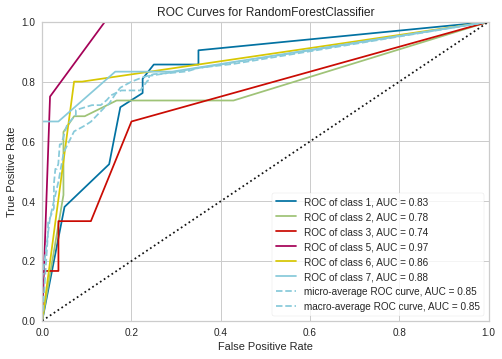

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_rf, plot = 'auc')

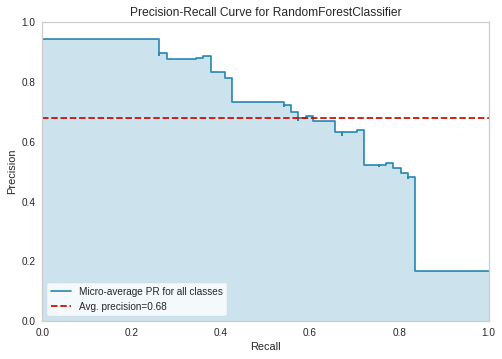

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_rf, plot = 'pr')

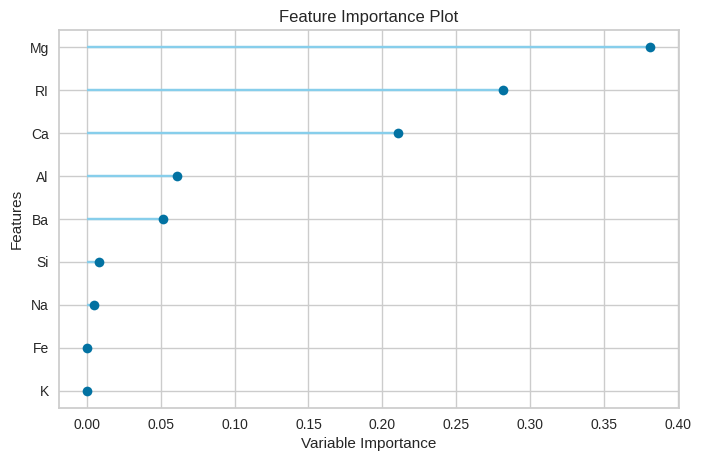

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_rf, plot='feature')

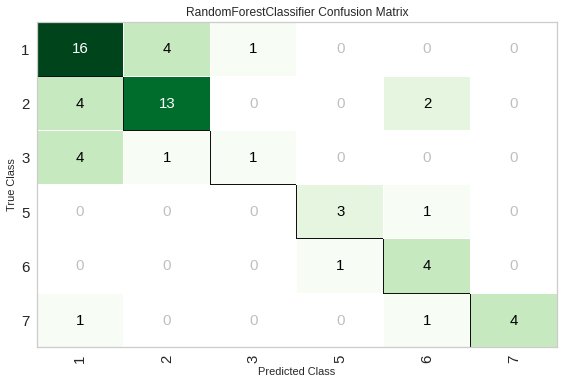

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [ ]:
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
final_rf = finalize_model(tuned_rf)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurit

In [ ]:
print(final_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [ ]:
save_model(final_rf,'Final RF Model 11Nov2020')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), model_name=Final RF Model 11Nov2020, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                  

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Type',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strateg...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight={}, criterion='entropy',
                                         max_depth=5, max_features=1.0,
                                         max_leaf_

In [ ]:
saved_final_rf = load_model('Final RF Model 11Nov2020')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Final RF Model 11Nov2020, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded
